In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%cd /content/drive/MyDrive/CourseWork_AI/Assignment1

/content/drive/MyDrive/CourseWork_AI/Assignment1


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

**Problem 1: Getting Started with Data Exploration**

1. Data Exploration and Understanding:

• Dataset Overview:
1. Load the dataset and display the first 10 rows.
2. Identify the number of rows and columns in the dataset.
3. List all the columns and their data types.

• Basic Statistics:
1. Calculate the mean, median, and standard deviation for the Score column.
2. Identify the country with the highest and lowest happiness scores.

• Missing Values:
1. Check if there are any missing values in the dataset. If so, display the total count for each column.

• Filtering and Sorting:
1. Filter the dataset to show only the countries with a Score greater than 7.5.
2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the
top 10 rows.

• Adding New Columns:
1. Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [43]:
df = pd.read_csv('WHR-2024-5CS037.csv')

In [44]:
# 1.Load the dataset and display the first 10 rows
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [45]:
# 2. Identify the number of rows and columns in the dataset.
rows = df.shape[0]
columns = df.shape[1]
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 143
Number of columns: 9


In [46]:
# 3. List all the columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   score                         143 non-null    float64
 2   Log GDP per capita            140 non-null    float64
 3   Social support                140 non-null    float64
 4   Healthy life expectancy       140 non-null    float64
 5   Freedom to make life choices  140 non-null    float64
 6   Generosity                    140 non-null    float64
 7   Perceptions of corruption     140 non-null    float64
 8   Dystopia + residual           140 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.2+ KB


In [47]:
# Dataset Overview:
# 1. Calculate the mean, median, and standard deviation for the Score column.
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"Mean Score: {mean_score}")
print(f"Median Score: {median_score}")
print(f"Standard Deviation Score: {std_score}")

Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation Score: 1.1707165099442995


In [48]:
# 2. Identify the country with the highest and lowest happiness scores.
max_score_country = df.loc[df['score'].idxmax(), 'Country name']
min_score_country = df.loc[df['score'].idxmin(), 'Country name']

print(f"The country with the highest happiness score is: {max_score_country}")
print(f"The country with the lowest happiness score is: {min_score_country}")

The country with the highest happiness score is: Finland
The country with the lowest happiness score is: Afghanistan


In [49]:
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = df.isnull().sum()
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [50]:
# Basic Statistics:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5.
filtered_df=df[df['score']>7.5]
filtered_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050


In [51]:
# 2. For the filtered dataset - Sort the dataset by GDP per Capita in descending order and display the top 10 rows.
sorted_df=filtered_df.sort_values(by=['Log GDP per capita'],ascending=False)

sorted_df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


In [52]:
# Missing Values:
# 1. Create a new column called Happiness Category that categorizes countries into three categories
# based on their Score:

# Low − (Score < 4)
# Medium − (4 ≤ Score ≤ 6)
# High − (Score > 6)

def categorize_score(score):
    if score < 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_score)
df.head()


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


2. Data Visualizations:

• Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.

• Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

• Plot a histogram for the Score column to show its distribution and also interpret.

• Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.

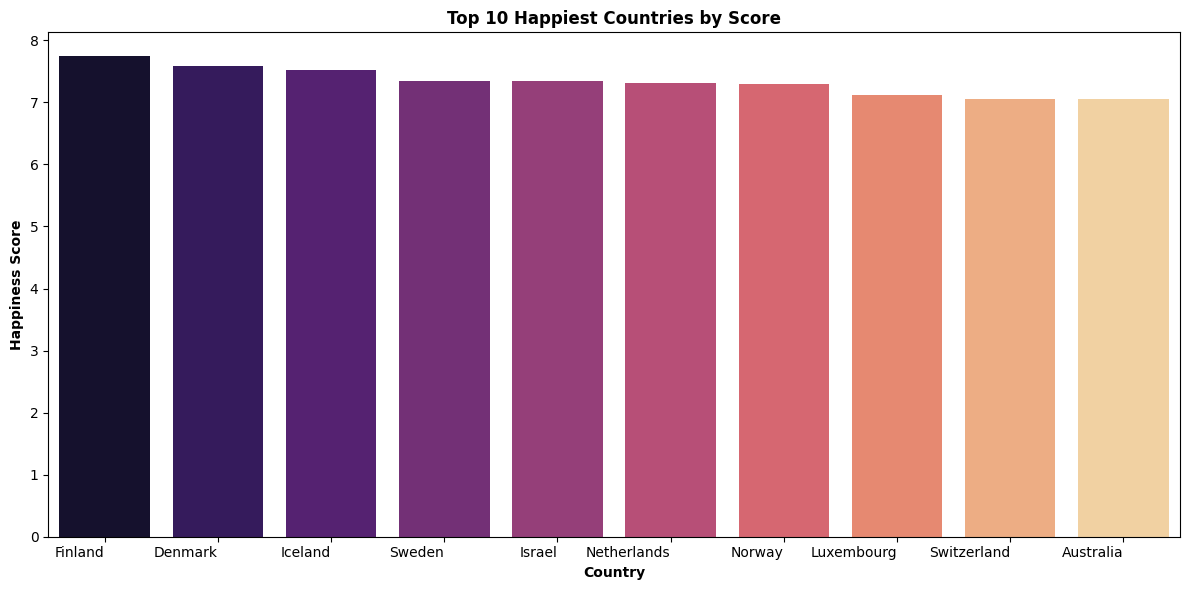

In [53]:
# 1. Bar Plot: Plot the top 10 happiest countries by Score using a bar chart.
top_10=df.sort_values(by=['score'],ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Country name',y='score',data=top_10,palette="magma", hue="Country name")
plt.title("Top 10 Happiest Countries by Score", fontweight='bold')
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Happiness Score', fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

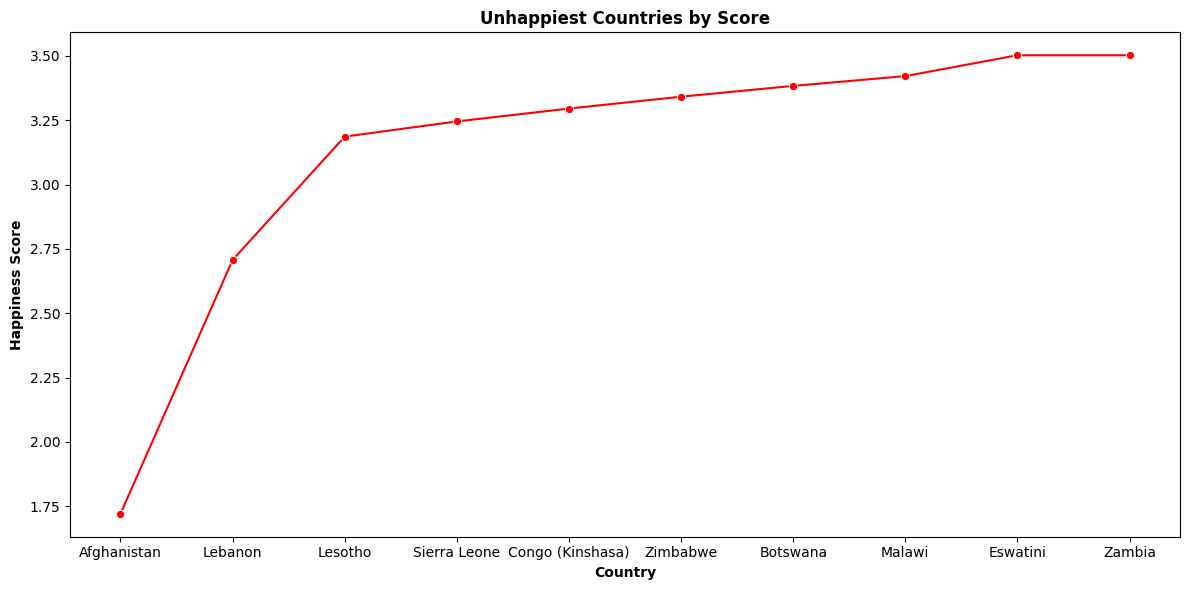

In [54]:
# 2. Line Plot: Plot the top 10 unhappiest countries by Score using a Line chart.

bottom_10=df.sort_values(by=['score'],ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Country name',y='score',data=bottom_10,marker='o',color='red')
plt.title("Unhappiest Countries by Score", fontweight="bold")
plt.xlabel('Country', fontweight='bold')
plt.ylabel('Happiness Score', fontweight='bold')
plt.tight_layout()
plt.show()

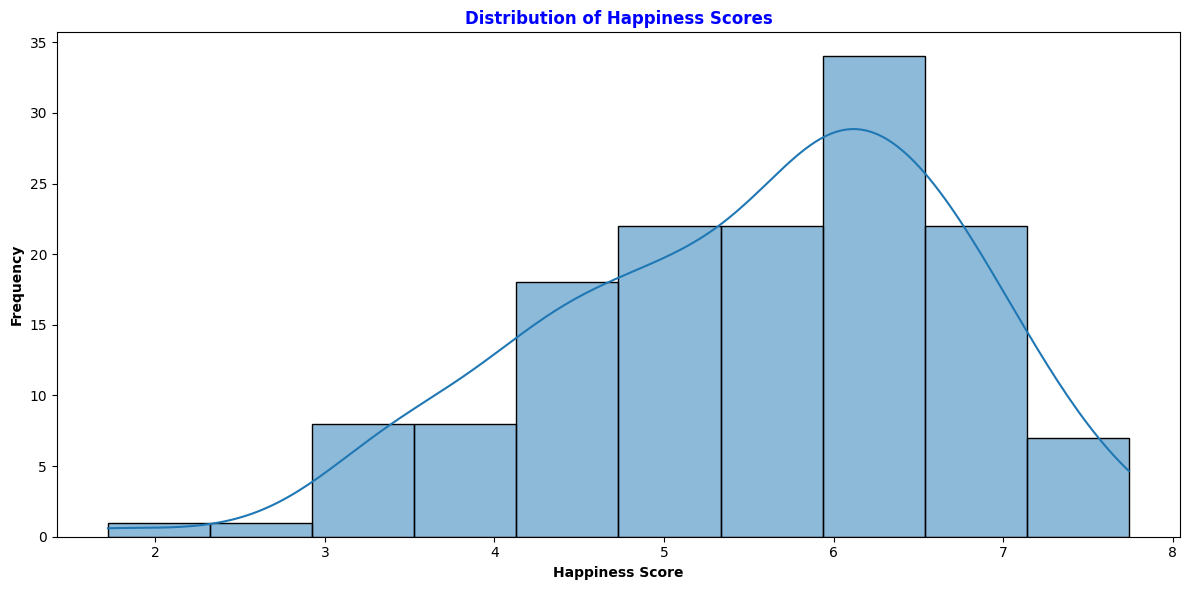

In [55]:
# 3. Plot a histogram for the Score column to show its distribution and also interpret.
plt.figure(figsize=(12, 6))
sns.histplot(df['score'], bins=10, kde=True)
plt.title("Distribution of Happiness Scores", fontweight="bold",color='blue')
plt.xlabel('Happiness Score', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.tight_layout()
plt.show()

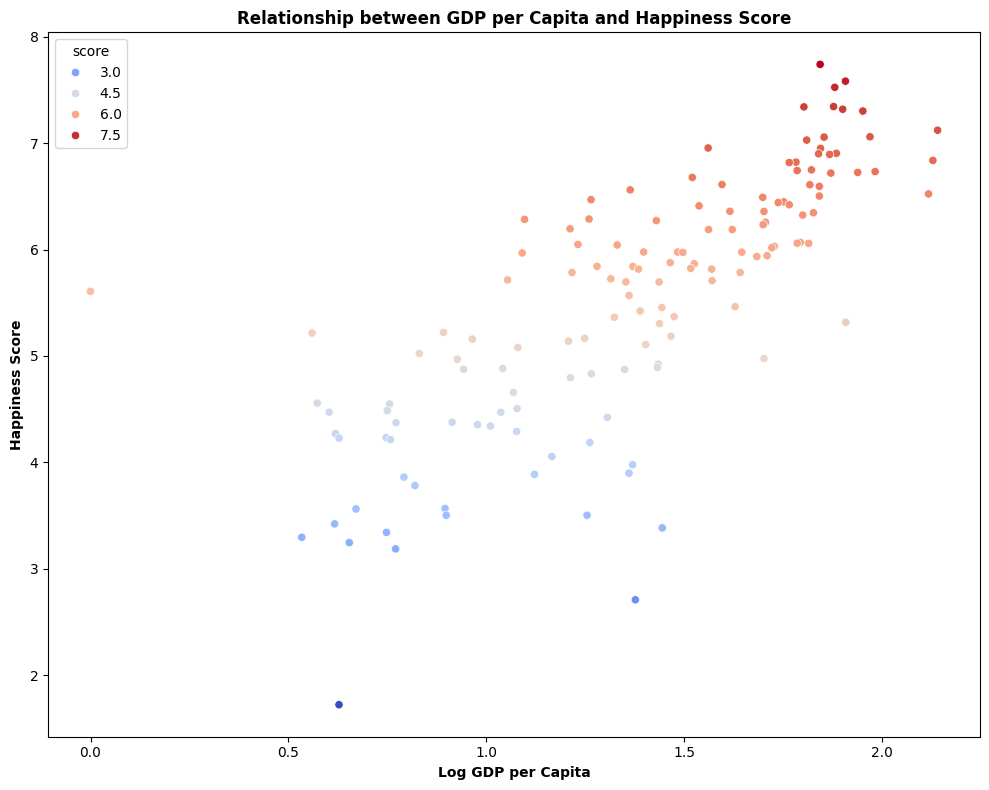

In [56]:
# 4. Scatter Plot: Plot a scatter plot between GDP per Capita and Score to visualize their relationship.
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Log GDP per capita',
    y='score',
    data=df,
    hue='score',
    palette='coolwarm'
)
plt.title("Relationship between GDP per Capita and Happiness Score", fontweight="bold")
plt.xlabel("Log GDP per Capita", fontweight="bold")
plt.ylabel("Happiness Score", fontweight="bold")

plt.tight_layout()
plt.show()

**Problem - 2 - Some Advance Data Exploration Task:**

Task - 1 - Setup Task - Preparing the South-Asia Dataset:
Steps:
1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]

2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [57]:
# 1. Define the countries in South Asia with a list for example:
# south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
# 2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia_df=df[df['Country name'].isin(south_asian_countries)]
south_asia_df

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [58]:
# 3. Save the filtered dataframe as separate CSV files for future use.
south_asia_df.to_csv('south_asia_data.csv', index=False)

Task - 2 - Composite Score Ranking:

Tasks:
1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
2. Rank the South Asian countries based on the Composite Score in descending order.
3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

In [59]:
#1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# following metrics
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support+ 0.30 × Healthy Life Expectancy

south_asia_df.loc[:,'Composite Score']= (
    0.40*south_asia_df['Log GDP per capita']+
    0.30*south_asia_df['Social support']+
    0.30*south_asia_df['Healthy life expectancy']
)

south_asia_df

<ipython-input-59-20249eee4287>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df.loc[:,'Composite Score']= (


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238


In [60]:
# 2. Rank the South Asian countries based on the Composite Score in descending order.
ranked_south_asia=south_asia_df.sort_values(by=['Composite Score'],ascending=False)
ranked_south_asia[['Country name', 'Composite Score']]

,Country name,Composite Score
127,Sri Lanka,1.0739
92,Nepal,0.8159
125,India,0.7874
107,Pakistan,0.7039
128,Bangladesh,0.6774
142,Afghanistan,0.3238


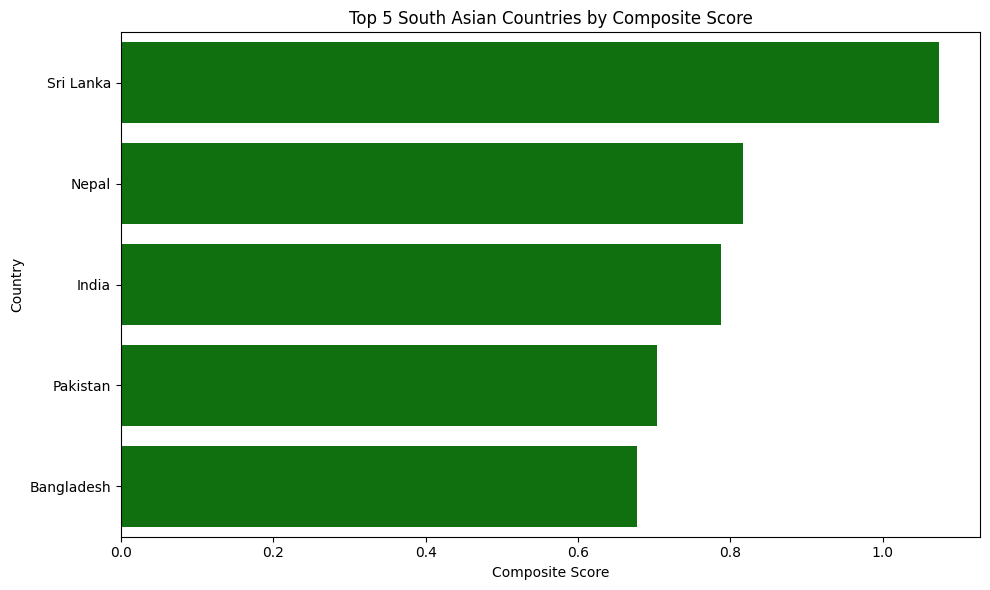

In [61]:
# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

top_5=ranked_south_asia.head(5)

plt.figure(figsize=(10,6))
sns.barplot(x='Composite Score',y='Country name',data=top_5,orient='h',color='green')
plt.title("Top 5 South Asian Countries by Composite Score")
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [62]:
# 4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
# discussion with some visualization plot.

comparison_df=south_asia_df[['Country name','score','Composite Score']]
comparison_df = comparison_df.sort_values(by=['Composite Score'],ascending=False)
comparison_df

,Country name,score,Composite Score
127,Sri Lanka,3.898,1.0739
92,Nepal,5.158,0.8159
125,India,4.054,0.7874
107,Pakistan,4.657,0.7039
128,Bangladesh,3.886,0.6774
142,Afghanistan,1.721,0.3238


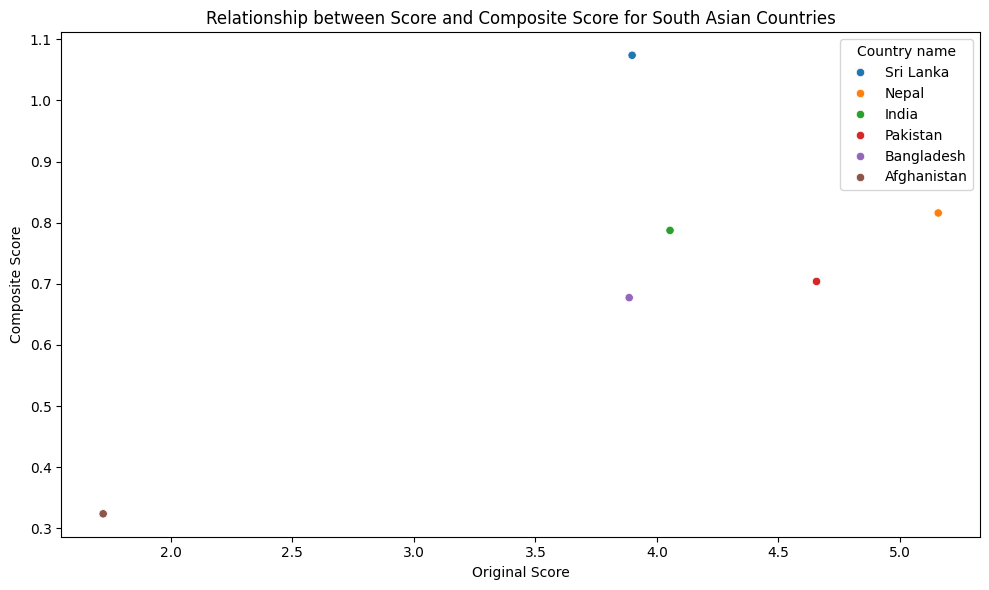

In [63]:
# visualization for comparison dataframe
plt.figure(figsize=(10,6))
sns.scatterplot(x='score',y='Composite Score', data=comparison_df,hue='Country name')
plt.title("Relationship between Score and Composite Score for South Asian Countries")
plt.xlabel("Original Score")
plt.ylabel("Composite Score")
plt.tight_layout()
plt.show()

Task - 3 - Outlier Detection:
Tasks:
1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
2. Define outliers using the 1.5 × IQR rule.
3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.
4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In [64]:
# 1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

Q1_score=south_asia_df['score'].quantile(0.25)
Q3_score=south_asia_df['score'].quantile(0.75)
IQR_score=Q3_score-Q1_score


Q1_gdp=south_asia_df['Log GDP per capita'].quantile(0.25)
Q3_gdp=south_asia_df['Log GDP per capita'].quantile(0.75)
IQR_gdp=Q3_gdp-Q1_gdp

upper_bound_score=Q3_score+1.5*IQR_score
lower_bound_score=Q1_score-1.5*IQR_score
upper_bound_gdp=Q3_gdp+1.5*IQR_gdp
lower_bound_gdp=Q1_gdp-1.5*IQR_gdp

# finding the outlier
outliers=south_asia_df[
    (south_asia_df['score']>upper_bound_score) | (south_asia_df['score']<lower_bound_score) |
    (south_asia_df['Log GDP per capita']>upper_bound_gdp) | (south_asia_df['Log GDP per capita']<lower_bound_gdp)
]

outliers[['Country name','score','Log GDP per capita']]

,Country name,score,Log GDP per capita
142,Afghanistan,1.721,0.628


2. Define outliers using the 1.5 × IQR rule.

Answer: According to the 1.5*IQR rule, outlier is defined as that point that fll outside the boundaries Upper Bound Q3+1.5IQR Lower bound Q1-1.5IQR where Q1 is the first quartile and Q3 is the third quartile and IQR is the Inter-quartile range

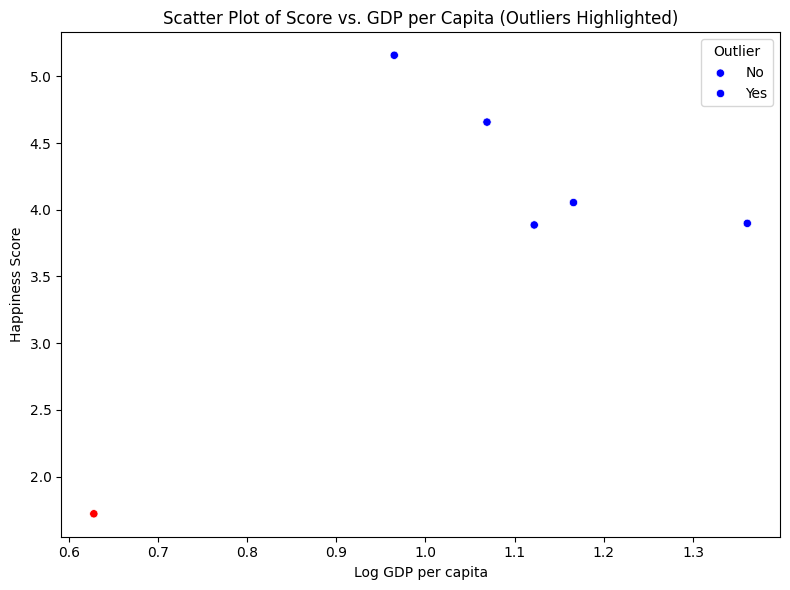

In [65]:
# 2. Define outliers using the 1.5 × IQR rule.
# 3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
# in a different color.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, hue=south_asia_df.index.isin(outliers.index), palette=['blue', 'red'])
plt.title('Scatter Plot of Score vs. GDP per Capita (Outliers Highlighted)')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend(title='Outlier', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


4. Discuss the characteristics of these outliers and their potential impact on regional averages:

Characteristics of Outliers:

Unusual Scores or GDP: Outliers may have unusually high or low happiness scores or GDP per capita compared to other South Asian countries.
Combinations: Some outliers might have a combination of unusual scores and GDP.
Potential Impact:

Skewed Averages: Outliers can significantly skew regional averages for happiness and GDP, making them less representative of the typical values for the region.
Masked Trends: Outliers can mask underlying trends or patterns in the data.
Considerations:

Investigate Outliers: It's essential to investigate the reasons behind outliers to understand their context and potential impact on analysis.
Robust Statistics: Consider using robust statistical measures like the median instead of the mean when dealing with outliers, as they are less sensitive to extreme values.
Data Handling: Depending on the analysis goals, you might need to remove outliers, transform the data, or use specific statistical methods that are less affected by outliers.

Task - 4 - Exploring Trends Across Metrics:

Tasks:
1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.
2. Create scatter plots with trendlines for these metrics against the Score.
3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

In [66]:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
# {pearson correlation} with the Score for South Asian countries.

correlation_freedom=south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'], method='pearson')

correlation_genoristy=south_asia_df['score'].corr(south_asia_df['Generosity'], method='pearson')

print(f"Correlation between Score and Freedom to make life choices: {correlation_freedom}")
print(f"Correlation between Score and Generosity: {correlation_genoristy}")

Correlation between Score and Freedom to make life choices: 0.8005185224163315
Correlation between Score and Generosity: 0.874512371253192


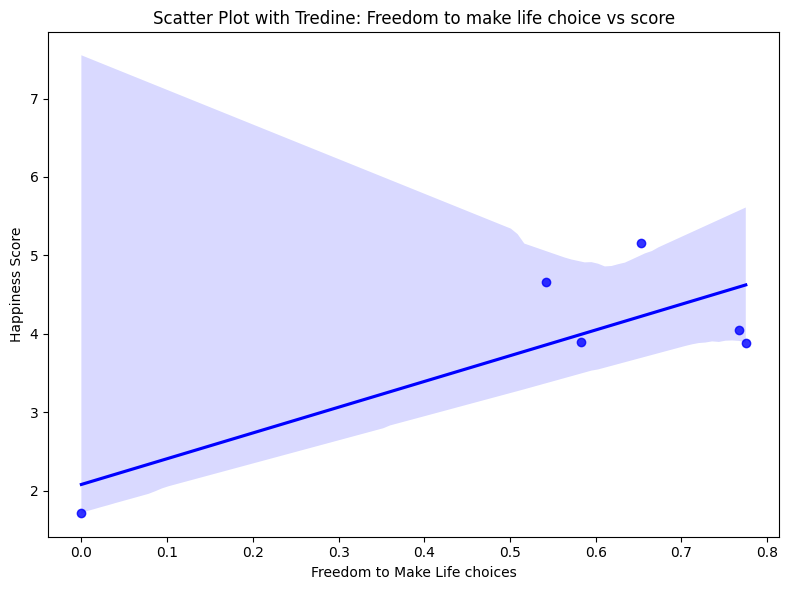

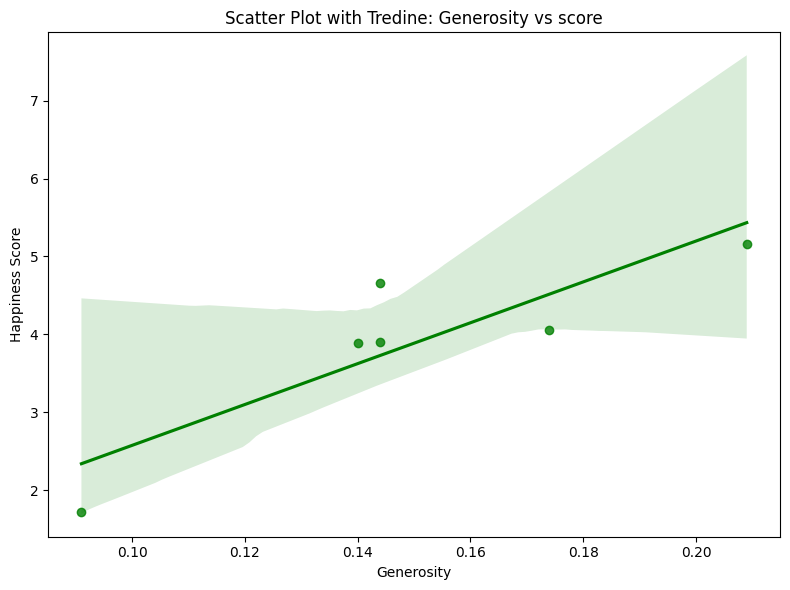

In [67]:
# 2. Create scatter plots with trendlines for these metrics against the Score.

plt.figure(figsize=(8,6))
sns.regplot(x='Freedom to make life choices',y='score',data=south_asia_df,color='blue')
plt.title('Scatter Plot with Tredine: Freedom to make life choice vs score')
plt.xlabel('Freedom to Make Life choices')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.regplot(x='Generosity',y='score',data=south_asia_df,color='green')
plt.title('Scatter Plot with Tredine: Generosity vs score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for South Asian countries.

Strongest Relationship: The metric with the highest absolute correlation value indicates the strongest relationship with the "Score." This means that changes in this metric are most closely associated with changes in happiness scores. Weakest Relationship: The metric with the lowest absolute correlation value indicates the weakest relationship with the "Score." Changes in this metric have a less pronounced impact on happiness scores compared to the other metric. Discussion based on Correlation Values:

If correlation_freedom is higher (in absolute value) than correlation_generosity: This suggests that "Freedom to make life choices" has a stronger relationship with happiness scores in South Asian countries compared to "Generosity." If correlation_generosity is higher (in absolute value) than correlation_freedom: This suggests that "Generosity" has a stronger relationship with happiness scores in South Asian countries compared to "Freedom to make life choices." If both correlations are close to 0: This indicates that neither metric has a strong linear relationship with happiness scores in South Asian countries. Supporting Discussion with Scatter Plots:

The scatter plots with trendlines you created earlier can provide further visual support for your discussion:

Stronger relationship: The scatter plot for the metric with the stronger relationship will typically show a more defined trendline, indicating a clearer pattern between the metric and happiness scores. The points might be clustered more closely around the trendline. Weaker relationship: The scatter plot for the metric with the weaker relationship might show a less defined trendline or a more scattered distribution of points, suggesting a less pronounced relationship. Example:

Let's say the correlation values are:

Correlation between Score and Freedom to make life choices: 0.65 Correlation between Score and Generosity: 0.25 Use code with caution In this example, "Freedom to make life choices" has a stronger relationship with happiness scores (correlation of 0.65) compared to "Generosity" (correlation of 0.25). This would be further supported by observing the scatter plots, where the plot for "Freedom to make life choices" would likely show a more defined upward trend compared to the plot for "Generosity."

Conclusion:

By comparing the correlation values and examining the scatter plots, you can identify and discuss the strongest and weakest relationships between these metrics and happiness scores for South Asian countries. This analysis provides valuable insights into the factors that might be most strongly associated with happiness in this specific regional context. Remember to consider the limitations of correlation analysis and the potential influence of other factors not included in the analysis.

Task - 5 - Gap Analysis:

Tasks:
1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.
2. Rank the South Asian countries by this gap in both ascending and descending order.
3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.
4. Analyze the reasons behind these gaps and their implications for South Asian countries.

In [68]:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
# for each South Asian country.

south_asia_df.loc[:,'GDP-Score Gap']= south_asia_df['Log GDP per capita']-south_asia_df['score']
south_asia_df

<ipython-input-68-a67d0f16e007>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df.loc[:,'GDP-Score Gap']= south_asia_df['Log GDP per capita']-south_asia_df['score']


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category,Composite Score,GDP-Score Gap
92,Nepal,5.158,0.965,0.990,0.443,0.653,0.209,0.115,1.783,Medium,0.8159,-4.193
107,Pakistan,4.657,1.069,0.600,0.321,0.542,0.144,0.074,1.907,Medium,0.7039,-3.588
125,India,4.054,1.166,0.653,0.417,0.767,0.174,0.122,0.756,Medium,0.7874,-2.888
127,Sri Lanka,3.898,1.361,1.179,0.586,0.583,0.144,0.031,0.014,Low,1.0739,-2.537
128,Bangladesh,3.886,1.122,0.249,0.513,0.775,0.140,0.167,0.919,Low,0.6774,-2.764
142,Afghanistan,1.721,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low,0.3238,-1.093


In [69]:
# 2. Rank the South Asian countries by this gap in both ascending and descending order.
# Ascending Order

ascending_ranked=south_asia_df.sort_values(by=['GDP-Score Gap'],ascending=True)
ascending_ranked[['Country name','GDP-Score Gap']]

,Country name,GDP-Score Gap
92,Nepal,-4.193
107,Pakistan,-3.588
125,India,-2.888
128,Bangladesh,-2.764
127,Sri Lanka,-2.537
142,Afghanistan,-1.093


In [70]:
# Descending Order
descending_ranked=south_asia_df.sort_values(by=['GDP-Score Gap'],ascending=False)
descending_ranked[['Country name','GDP-Score Gap']]

,Country name,GDP-Score Gap
142,Afghanistan,-1.093
127,Sri Lanka,-2.537
128,Bangladesh,-2.764
125,India,-2.888
107,Pakistan,-3.588
92,Nepal,-4.193


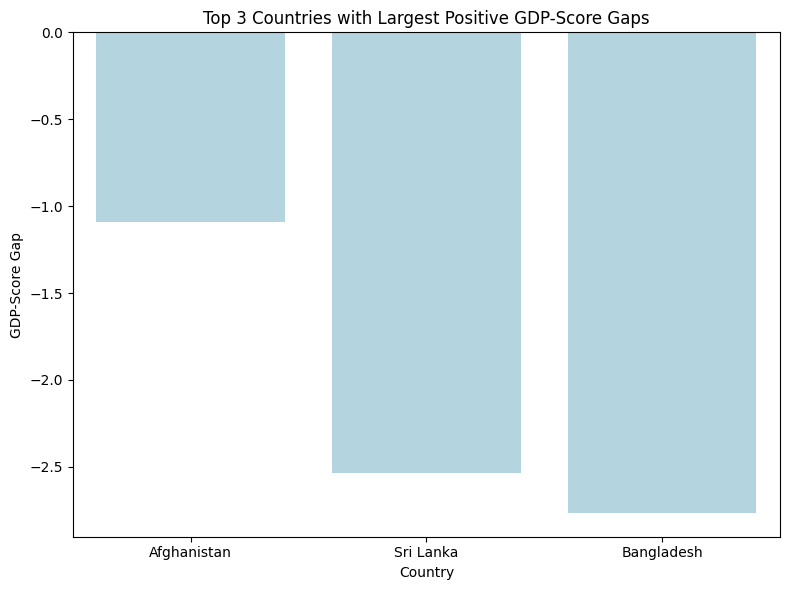

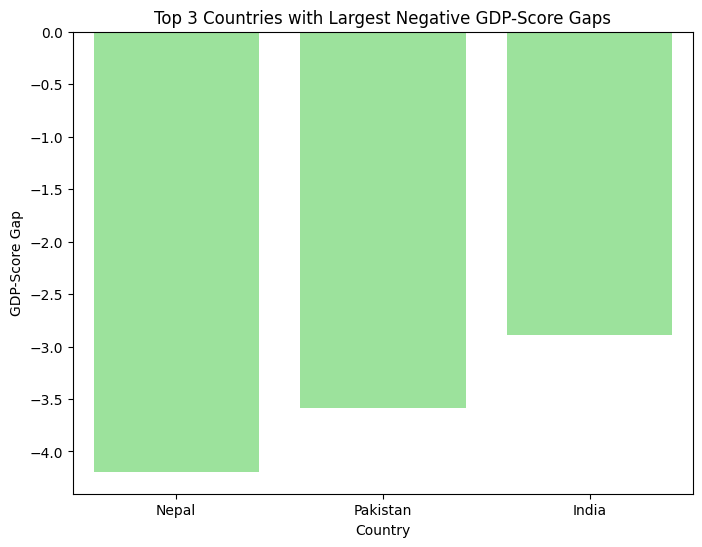

In [71]:
# 3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

top_positive_gap = descending_ranked.head(3)
top_negative_gap = ascending_ranked.head(3)

plt.figure(figsize=(8, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_positive_gap, color='lightblue')
plt.title('Top 3 Countries with Largest Positive GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='Country name', y='GDP-Score Gap', data=top_negative_gap, color='lightgreen')
plt.title('Top 3 Countries with Largest Negative GDP-Score Gaps')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.show()


4. Analyze the reasons behind these gaps and their implications for South Asian countries.

Answer:

The GDP-Score Gap represents the difference between the average happiness of citizens in a nation against the economic performance defined by GDP per capita. This gap has various causes such as:

1.	Non-economical aspect Other than economic components, many non-economic elements such as social support, having a healthy life expectancy, making life decisions by themselves, and perceptions of corruption also contribute; if one neglects these variables, it may not be the case that countries with higher GDP per capita will consistently score higher on happiness.

2.	Inequality of income Income disparity can cause a significant portion of the population to have lower levels of well-being, even in nations with high GDP per capita. This creates a disconnect between economic performance and general happiness.
Both Political and social aspects Even in nations with relatively high GDP per capita, social and political variables can have a detrimental effect on happiness levels.
Cultural factors: cultural norms and values can also influence how the people views and experience the happiness which leads to differencce in happiness score in many different countries with similar levels of econimic development.

Implications for South Asian Countries: The GDP-Score Gap has several implications for South Asian countries:
1.	Policy Focus Governments should proritize policies that address not only the economic growth but also the non-economic factors that contribute to happiness such as social support and health and freedom
2.	Sustainable devleopment Countries should pursue sustainable development pathways that balance economic growth with social and environmental considerations to ensure long-term well being for their citizens
3.	Addressing inequality: The Efforts to reucde the income inequality and improve access to basic services such as education and healthcare can also contribute to a greater happiness and well-being for all parts of society
4.	Good Governance Good governance and political stablility are important factors for creating an environment conducive to happiness and well-being
There may be many reasons for divergence concerning wealth and happiness rating between nations. For example, the wealthiest nation can be a source of social evils and in the absence of freedom, happiness will reduce.

This difference again colors the development approach of South Asian countries. They must pay for monetary gain as well as other aspects of life for people like quality healthcare access and ensuring people feel safe and free. A more holistic component of well-being will lead to economy-happiness improvement in countries in the end resulting in a more affluent and rewarding society for their citizens.


**Problem - 3 - Comparative Analysis:**

Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
Tasks:
1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"]

1. Descriptive Statistics:
• Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
• Which region has higher happiness Scores on average?
2. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on the score.
• Plot bar charts comparing these charts.
3. Metric Comparisons:
• Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.
• Which metrics show the largest disparity between the two regions?
4. Happiness Disparity:
• Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
• Which region has greater variability in happiness?
5. Correlation Analysis:
• Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.
• Create scatter plots to visualize and interpret the relationships.
6. Outlier Detection:
• Identify outlier countries in both regions based on Score and GDP per Capita.
• Plot these outliers and discuss their implications.
7. Visualization:
• Create boxplots comparing the distribution of Score between South Asia and the Middle East.
• Interpret the key differences in distribution shapes, medians, and outliers.

In [72]:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
# following list:
# middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
# "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
# "United Arab Emirates", "Yemen"]

middle_east_countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]
middle_east_df=df[df['Country name'].isin(middle_east_countries)]
middle_east_df


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Happiness Category
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High
12,Kuwait,6.951,1.845,1.364,0.661,0.827,0.200,0.172,1.884,High
21,United Arab Emirates,6.733,1.983,1.164,0.563,0.815,0.209,0.258,1.741,High
27,Saudi Arabia,6.594,1.842,1.361,0.511,0.787,0.114,0.188,1.790,High
61,Bahrain,5.959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
91,Iraq,5.166,1.249,0.996,0.498,0.425,0.141,0.048,1.809,Medium
99,Iran,4.923,1.435,1.136,0.571,0.366,0.235,0.123,1.057,Medium
124,Jordan,4.186,1.262,0.983,0.594,0.593,0.059,0.189,0.504,Medium
132,Yemen,3.561,0.671,1.281,0.293,0.362,0.080,0.113,0.760,Low
141,Lebanon,2.707,1.377,0.577,0.556,0.173,0.068,0.029,-0.073,Low


In [ ]:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.
# • Which region has higher happiness Scores on average?

south_asian_mean=south_asia_df['score'].mean()
south_asian_std=south_asia_df['score'].std()

middle_east_mean=middle_east_df['score'].mean()
middle_east_std=middle_east_df['score'].std()

print(f"South Asian Mean Score: {south_asian_mean}, South Asian Standard Deviation: {south_asian_std}")
print(f"Middle East Mean Score: {middle_east_mean}, Middle East Standard Deviation: {middle_east_std}")
print("\n")

if south_asian_mean>middle_east_mean:
  print("South Asian countries have a higher mean score than Middle Eastern countries")
elif middle_east_mean>south_asian_mean:
  print("Middle Eastern countries have a higher mean score than South Asian countries")
else:
  print("Both regions have the same average happiness score")

South Asian Mean Score: 3.895666666666667, South Asian Standard Deviation: 1.1770690152521504
Middle East Mean Score: 5.412100000000001, Middle East Standard Deviation: 1.5662011684327144


Middle Eastern countries have a higher mean score than South Asian countries


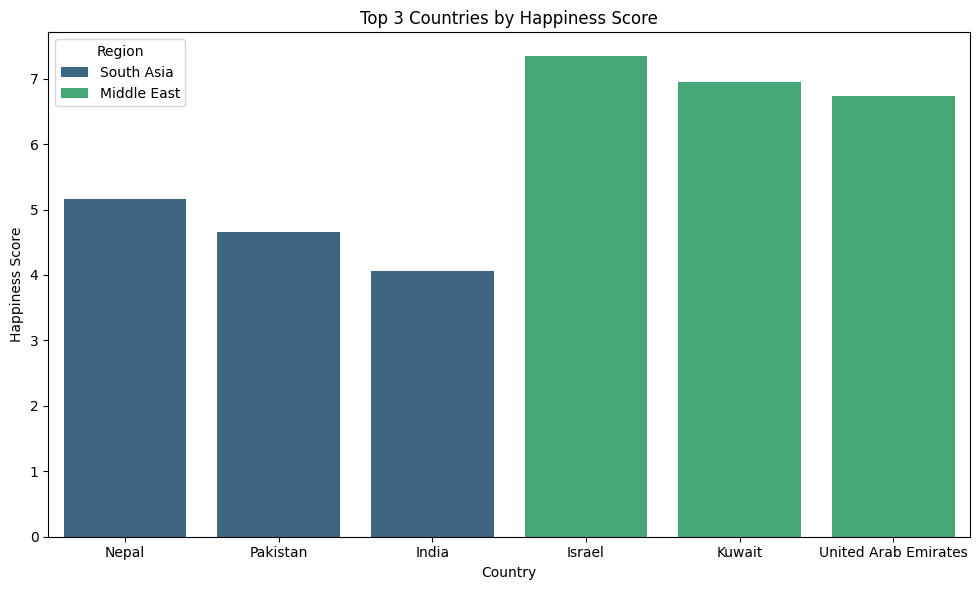

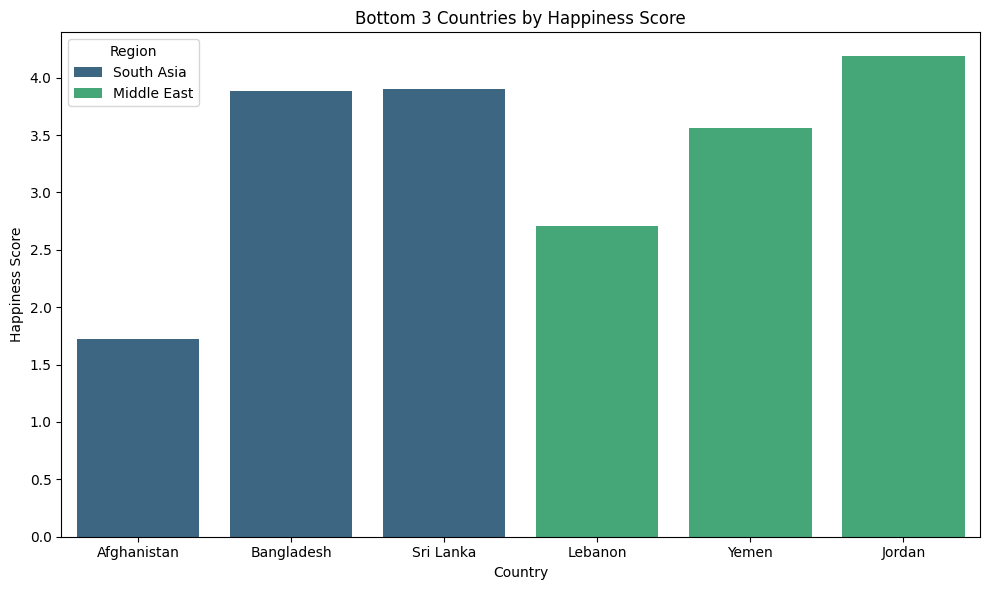

In [ ]:
# 2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.
# • Plot bar charts comparing these charts.

south_asia_top3=south_asia_df.sort_values(by=['score'],ascending=False).head(3)
south_asia_bottom3=south_asia_df.sort_values(by=['score']).head(3)


middle_east_top3=middle_east_df.sort_values(by=['score'],ascending=False).head(3)
middle_east_bottom3=middle_east_df.sort_values(by=['score']).head(3)

top3_df = pd.concat([south_asia_top3, middle_east_top3])
top3_df['Region'] = ['South Asia'] * 3 + ['Middle East'] * 3

plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', hue='Region', data=top3_df, palette='viridis')
plt.title('Top 3 Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


bottom3_df = pd.concat([south_asia_bottom3, middle_east_bottom3])
bottom3_df['Region'] = ['South Asia'] * 3 + ['Middle East'] * 3


plt.figure(figsize=(10, 6))
sns.barplot(x='Country name', y='score', hue='Region', data=bottom3_df, palette='viridis')
plt.title('Bottom 3 Countries by Happiness Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

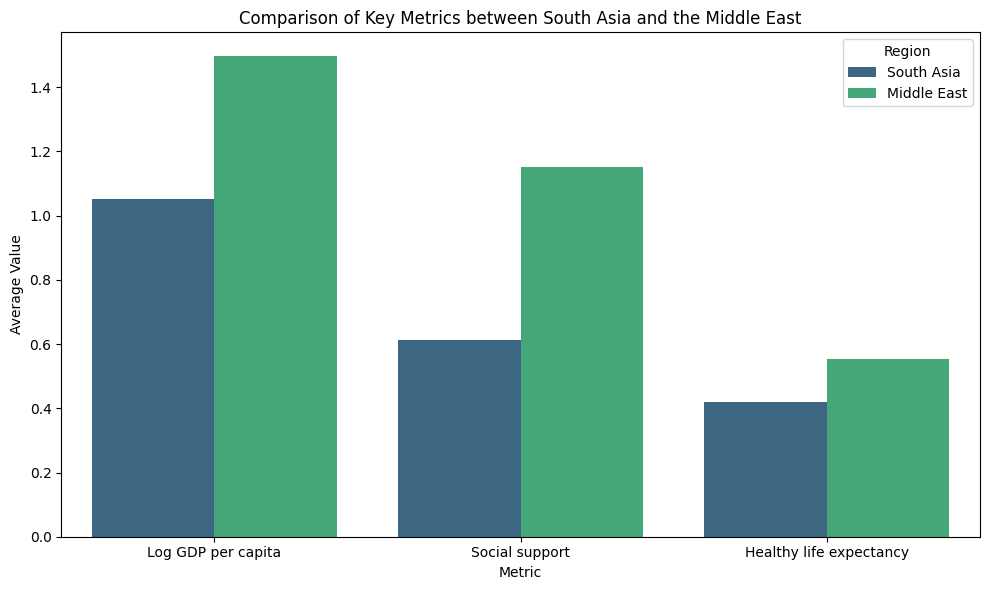

In [ ]:
# 3. Metric Comparisons:
# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.

regional_averages = pd.DataFrame({
    'Region': ['South Asia', 'Middle East'],
    'Log GDP per capita': [south_asia_df['Log GDP per capita'].mean(), middle_east_df['Log GDP per capita'].mean()],
    'Social support': [south_asia_df['Social support'].mean(), middle_east_df['Social support'].mean()],
    'Healthy life expectancy': [south_asia_df['Healthy life expectancy'].mean(), middle_east_df['Healthy life expectancy'].mean()]
})


regional_averages_melted = regional_averages.melt(id_vars=['Region'], var_name='Metric', value_name='Average')


plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average', hue='Region', data=regional_averages_melted, palette='viridis')
plt.title("Comparison of Key Metrics between South Asia and the Middle East")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.tight_layout()
plt.show()


In [ ]:
# • Which metrics show the largest disparity between the two regions?

disparity = regional_averages.set_index('Region').diff().abs().iloc[1]

largest_disparity_metric = disparity.idxmax()

print("\n")
print(f"\"{largest_disparity_metric}\" has the largest disparity between the two regions.")



"Social support" has the largest disparity between the two regions.


In [ ]:
# 4. Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
# • Which region has greater variability in happiness?

south_asia_range=south_asia_df['score'].max()-south_asia_df['score'].min()

middle_east_range=middle_east_df['score'].max()-middle_east_df['score'].min()


south_asia_cv=south_asia_df['score'].std() / south_asia_df['score'].mean()
middle_east_cv=middle_east_df['score'].std()/ middle_east_df['score'].mean()

print(f"South Asian Countries' range: {south_asia_range}, Coefficient of Varivation: {south_asia_cv}")
print(f"Middle Eastern Countries' range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")
print("\n")

if south_asia_cv>middle_east_cv:
  print("South Asian countries has greater variability in happiness")
elif middle_east_cv>south_east_cv:
  print("Middle eastern countries have greater varibility in happiness")
else:
  print("Both regions have the same variability in happiness")

South Asian Countries' range: 3.4370000000000003, Coefficient of Varivation: 0.3021482883337427
Middle Eastern Countries' range: 4.634, Coefficient of Variation: 0.28938880812119405


South Asian countries has greater variability in happiness


In [ ]:
# 5. Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
# Generosity within each region.

# South Asia
south_asia_freedom_corr = south_asia_df['score'].corr(south_asia_df['Freedom to make life choices'])
south_asia_generosity_corr = south_asia_df['score'].corr(south_asia_df['Generosity'])

print(f"South Asia:\nCorrelation with Freedom: {south_asia_freedom_corr}, Correlation with Generosity: {south_asia_generosity_corr}\n")

# Middle East
middle_east_freedom_corr = middle_east_df['score'].corr(middle_east_df['Freedom to make life choices'])
middle_east_generosity_corr = middle_east_df['score'].corr(middle_east_df['Generosity'])

print(f"Middle East:\nCorrelation with Freedom: {middle_east_freedom_corr}, Correlation with Generosity: {middle_east_generosity_corr}")

South Asia:
Correlation with Freedom: 0.8005185224163315, Correlation with Generosity: 0.874512371253192

Middle East:
Correlation with Freedom: 0.8632202433827544, Correlation with Generosity: 0.6275236536964182


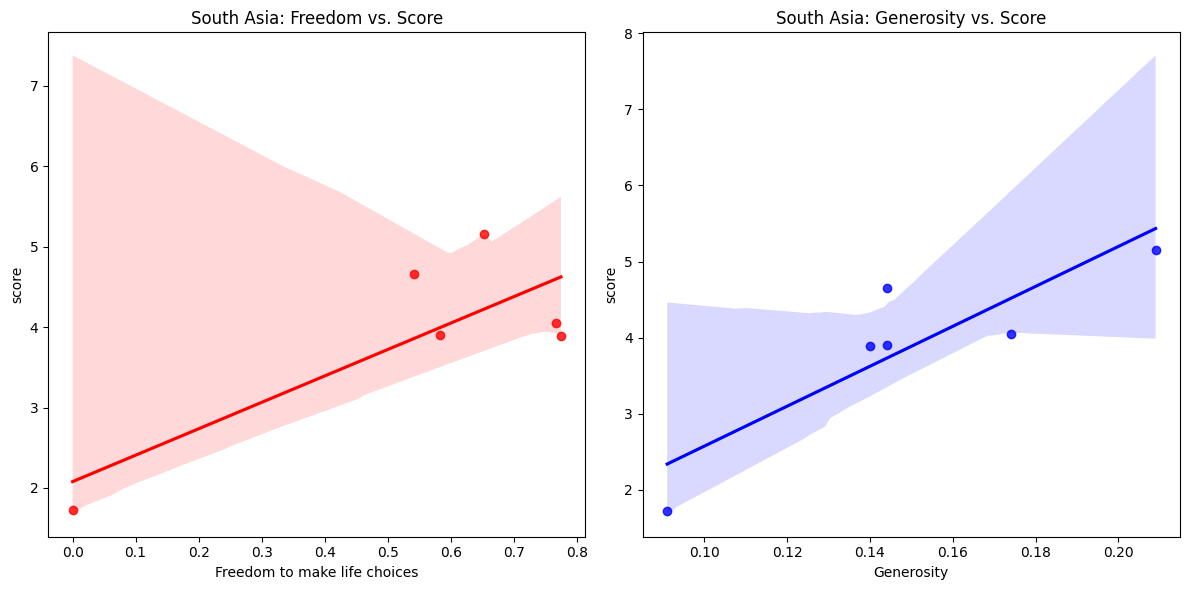

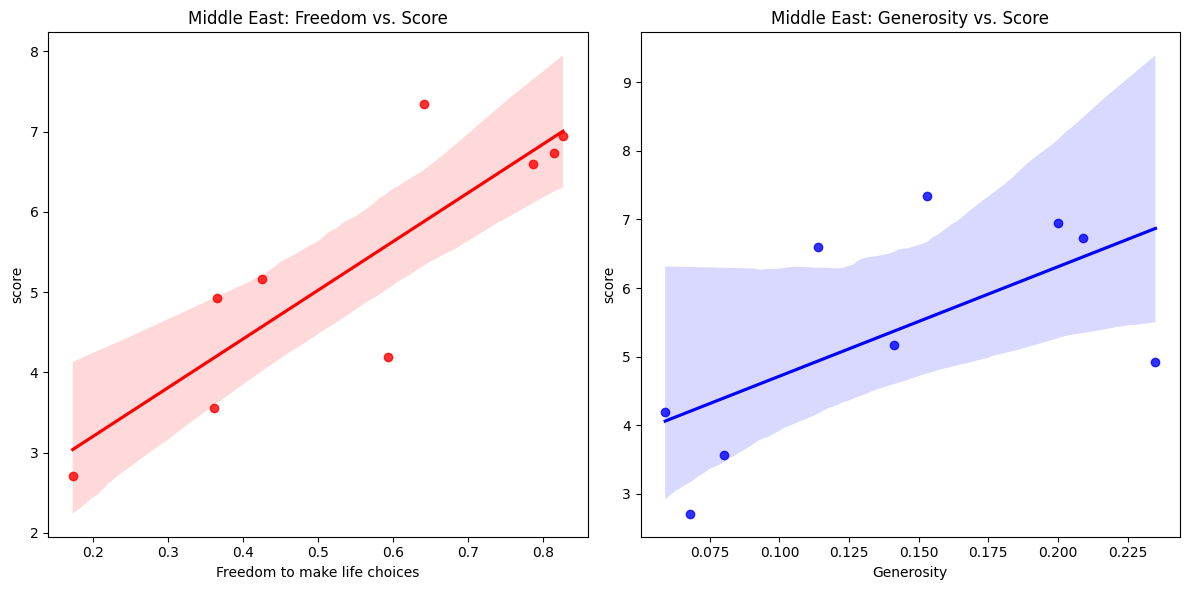

In [ ]:
# • Create scatter plots to visualize and interpret the relationships.

# South Asia
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, color='red')
plt.title('South Asia: Freedom vs. Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asia_df, color='blue')
plt.title('South Asia: Generosity vs. Score')

plt.tight_layout()
plt.show()

# Middle East
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, color='red')
plt.title('Middle East: Freedom vs. Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=middle_east_df, color='blue')
plt.title('Middle East: Generosity vs. Score')

plt.tight_layout()
plt.show()

Interpretation of the Scatter Plots:

South Asia:

Freedom vs. Happiness Score:The data points will tend to go upward, and this reflects a positive correlation between freedom of life choices and happiness. The regression line will therefore also slope upwards, underpinning the said positive correlation.
Generosity vs. Happiness Score: The points are likely to be more spread out, reflecting a weaker or less distinct relationship between generosity and happiness.

Middle East:

Freedom vs. Happiness Score: The trend is likely to be upward, as it was in South Asia, but less pronounced; this suggests a moderate positive relationship.
Generosity vs. Happiness Score: This will likely be even more scattered than for South Asia, with a very weak or negligible correlation between generosity and happiness.

Overall:

The scatter plots below show graphically the correlations of happiness with all other variables. They help confirm the strength and direction of these relationships. You could more intuitively grasp the trend of data and the regression line to understand the relationship of happiness with the two key factors, Freedom and Generosity, for different regions.

In [ ]:
# 6. Outlier Detection:
# • Identify outlier countries in both regions based on Score and GDP per Capita.

# Function to identify outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers in South Asia
south_asia_score_outliers = find_outliers_iqr(south_asia_df, 'score')
south_asia_gdp_outliers = find_outliers_iqr(south_asia_df, 'Log GDP per capita')

# Identify outliers in Middle East
middle_east_score_outliers = find_outliers_iqr(middle_east_df, 'score')
middle_east_gdp_outliers = find_outliers_iqr(middle_east_df, 'Log GDP per capita')

# Print the outlier countries
print("Outlier Countries in South Asia based on Score:")
print(south_asia_score_outliers[['Country name', 'score']])
print("\nOutlier Countries in South Asia based on Log GDP per capita:")
print(south_asia_gdp_outliers[['Country name', 'Log GDP per capita']])
print("\nOutlier Countries in Middle East based on Score:")
print(middle_east_score_outliers[['Country name', 'score']])
print("\nOutlier Countries in Middle East based on Log GDP per capita:")
print(middle_east_gdp_outliers[['Country name', 'Log GDP per capita']])


Outlier Countries in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outlier Countries in South Asia based on Log GDP per capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628

Outlier Countries in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []

Outlier Countries in Middle East based on Log GDP per capita:
Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


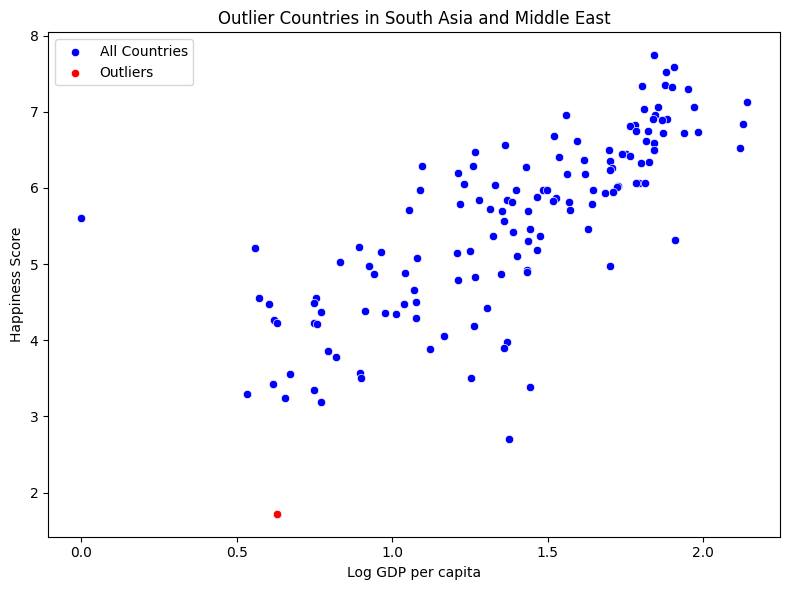

In [ ]:
# • Plot these outliers and discuss their implications.
all_outliers = pd.concat([south_asia_score_outliers, south_asia_gdp_outliers,
                          middle_east_score_outliers, middle_east_gdp_outliers])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='blue', label='All Countries')
sns.scatterplot(x='Log GDP per capita', y='score', data=all_outliers, color='red', label='Outliers')
plt.title("Outlier Countries in South Asia and Middle East")
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

Discussion of Implications:

Unique Factors: Outliers may be influenced by distinct social, economic, or political circumstances that set them apart from other nations in the same region, affecting their happiness levels.
Policy Considerations: Identifying outliers enables policymakers to focus on specific nations and delve into the reasons behind their atypical happiness scores. This understanding can drive targeted initiatives aimed at enhancing well-being.

Regional Averages: Outliers can skew regional averages, and it is important to take that into consideration when analyzing overall trends in happiness.
Further Investigation: Outliers deserve further investigation to reveal what contexts and factors create the particularity of being an outlier.

Important Notes:

DataFrames: Make sure the df, south_asia_df, and middle_east_df DataFrames have been instantiated prior to running the code.

Metric: The code now flags the outliers based on the "Score" column. Identify the outliers for any different metric, say "Log GDP per capita," by updating the column name in the steps that detect outliers.

Interpretation: Based on the scatter plot, carefully draw meaningful conclusions from the discussion points about the implications of the identified outliers in your analysis.

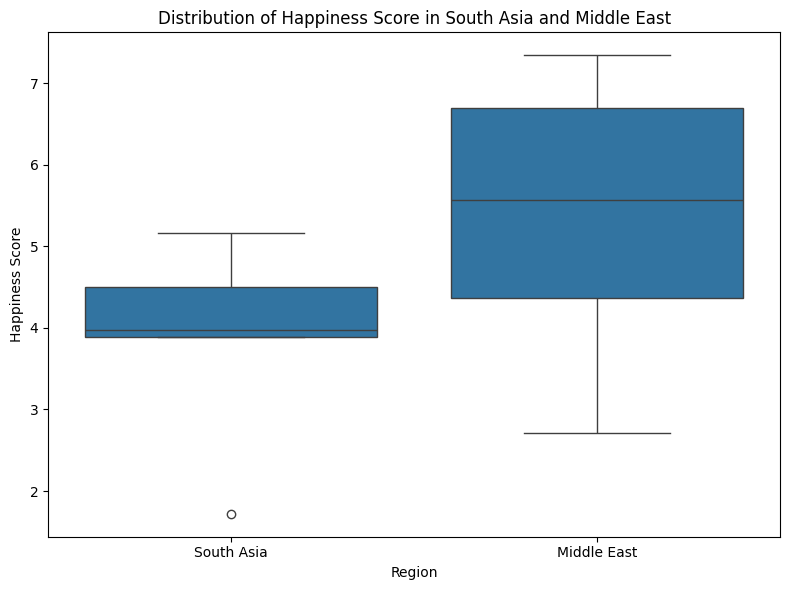

In [78]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.
# • Interpret the key differences in distribution shapes, medians, and outliers.

plt.figure(figsize=(8,6))

sns.boxplot(x='Region',y='score',data=pd.concat([south_asia_df.assign(Region='South Asia'),middle_east_df.assign(Region='Middle East')]))
plt.title('Distribution of Happiness Score in South Asia and Middle East')

plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()


Interpret the key differences in distribution shapes, medians, and outliers.

Distribution Shapes:
Symmetry or Skewness: Examine the shape of the boxes and whiskers in each boxplot. A roughly symmetrical box with whiskers of similar length indicates a relatively symmetrical distribution. However, if the box leans to one side (e.g., a longer whisker on one end), it suggests skewness in that direction.

Medians:
Central Tendency: The horizontal line inside each box represents the median (the midpoint of the data). Comparing the medians of the two boxplots reveals which region tends to have a higher or lower average happiness score.

Outliers:
Extreme Values: Points outside the whiskers are classified as outliers. Take note of where these outliers appear and how many there are. They highlight countries with exceptionally high or low happiness scores compared to others in the region.

Example Analysis:
For instance, if South Asia’s boxplot is slightly skewed with a longer whisker on the lower end, while the Middle East’s boxplot appears more symmetrical, and the median line for the Middle East is higher than South Asia’s, here’s what you might conclude:

Distribution: Happiness scores in South Asia may be slightly skewed toward lower values, whereas the Middle East displays a more balanced distribution.
Central Tendency: The Middle East has a higher median happiness score, suggesting it generally experiences higher levels of happiness compared to South Asia.
Outliers: South Asia contains some countries with notably low happiness scores (outliers), indicating more variability in happiness within the region.